- set up environment

In [7]:
# set up environment

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, PCA

# for Set working folder, etc.
import os
import os.path

# for sampling 
import random

# set working folder
# fw slashes for windows
cwd_desired = "C:/Users/Bonita/Documents/work/velexi/neural networks" 
os.chdir(cwd_desired) 

# test code
# print(os.getcwd())                           

- ETL spectrum files

In [8]:
# etl spectrum files

# turn files into lists and cut off first line
# put into database "spectra"
# turn deleted points (flagged as -1.23e+34) into 0's


# init spectra and class databases
spectra_wd = str(cwd_desired + "/spectra2")
num_samples = len([name for name in os.listdir(spectra_wd) if \
                   os.path.isfile(os.path.join(spectra_wd,name))])
# test code 
print(num_samples)

spectrum_len = 480                                 # 480 >= the BECK spectrometer spectrum length
spectra = np.zeros((num_samples,spectrum_len))             
y = np.zeros((num_samples, 1))

# fill databases
i = 0

# find spectra folder
os.chdir(spectra_wd)

# etl the data
for filename in os.listdir(spectra_wd):
    file_object  = open(filename, 'r').readlines()
    # strip off header, add to matrix 'spectra'
    spectra[i,:] = file_object[1:]                  
    
    # label spectrum class, based on header
    # actinolite: 0, alunite: 1, calcite: 2
    material_name = file_object[0]
    
    # testcode
    # print(material_name)
    
    if material_name.find('Actinolite',)!= -1: #if material name contains actinolite
        y[i,0] = 0
    elif material_name.find('Alunite',)!= -1:
        y[i,0] = 1
    else:                   #calcite
        y[i,0] = 2         
               
    # turn deleted points into 0
    for j in range(spectrum_len):  
        if spectra[i,j] <0:
            spectra[i,j]=0                          
    i+=1

# test code
# print(y[:])
# print(spectra[0:2,0])

32


- Load data

In [12]:
# divide up data randomly

# 80% training data 20% test for this pilot
# eventually, 60% training set, 20% validation set, 20% test set
samples = list(range(0, num_samples))
train_set_size = 4*(num_samples//5)
test_set_size= num_samples-train_set_size
train_set_indices = random.sample(samples,train_set_size)
test_set_indices = np.setdiff1d(samples,train_set_indices)     #fixed bug: take remaining samples after making train set

# test code
# print(train_set_indices)
# print(test_set_indices)

# make train and test sets

train_set = spectra[train_set_indices, :]
train_labels = y[train_set_indices, :]
test_set = spectra[test_set_indices, :]
test_labels = y[test_set_indices, :]




- make nn model


In [10]:
# make nn model

# build model

model = keras.Sequential([
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

# compile
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train
model.fit(train_set, train_labels, epochs=15)

Epoch 1/15
24/24 [==============================] - 0s 12ms/step - loss: 1.0009 - acc: 0.5000
Epoch 2/15
24/24 [==============================] - 0s 123us/step - loss: 0.9443 - acc: 0.5417
Epoch 3/15
24/24 [==============================] - 0s 83us/step - loss: 0.9211 - acc: 0.5417
Epoch 4/15
24/24 [==============================] - 0s 125us/step - loss: 0.9198 - acc: 0.5417
Epoch 5/15
24/24 [==============================] - 0s 125us/step - loss: 0.9257 - acc: 0.5417
Epoch 6/15
24/24 [==============================] - 0s 125us/step - loss: 0.9298 - acc: 0.5417
Epoch 7/15
24/24 [==============================] - 0s 166us/step - loss: 0.9302 - acc: 0.5417
Epoch 8/15
24/24 [==============================] - 0s 126us/step - loss: 0.9270 - acc: 0.5417
Epoch 9/15
24/24 [==============================] - 0s 125us/step - loss: 0.9217 - acc: 0.5417
Epoch 10/15
24/24 [==============================] - 0s 125us/step - loss: 0.9159 - acc: 0.5417
Epoch 11/15
24/24 [==============================] 

- run nn test

In [11]:
test_loss, test_acc = model.evaluate(test_set, test_labels)

print('NN Test accuracy:', test_acc)

8/8 [==============================] - 0s 10ms/step
NN Test accuracy: 0.25


- plot spectra

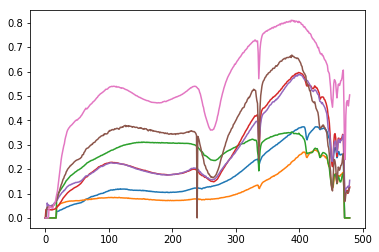

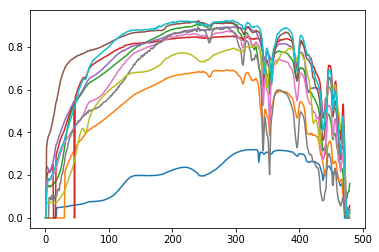

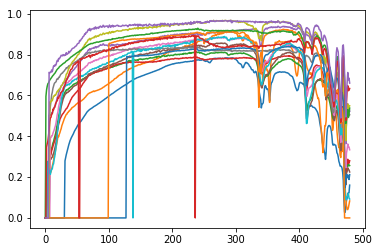

In [14]:
num0 = 0 #number of samples of class 0
num1 = 0
num2 = 0

# count the number of each class to make spectra0, spectra1, spectra2 databases
for i in range(num_samples):
    if y[i,0]== 0:
        num0 += 1
    elif y[i,0]== 1:
        num1 += 1
    elif y[i,0]== 2:
        num2 += 1

# make class-specific databases spectra0, ...1, ...2
spectra0 = np.zeros((num0,spectrum_len)) 
spectra1 = np.zeros((num1,spectrum_len)) 
spectra2 = np.zeros((num2,spectrum_len)) 

# make counters for each database to place spectra
i0 = 0
i1 = 0
i2 = 0

# populate class-specific databases spectra0, ...1, ...2
for i in range(num_samples):
    if y[i,0]== 0:
        spectra0[i0,:] = spectra[i,:]
        i0 +=1
    elif y[i,0]== 1:
        spectra1[i1,:] = spectra[i,:]
        i1 +=1
    else:
        spectra2[i2,:] = spectra[i,:]
        i2 +=1

# plot each class-specific database separately
for i in range(i0):
    plt.plot(spectra0[i,:])
plt.figure()

for i in range(i1):
    plt.plot(spectra1[i,:])
plt.figure()

for i in range(i2):
    plt.plot(spectra2[i,:])


7
10
15


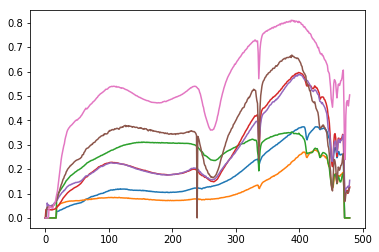

In [12]:
# testcode - i don't understand why it looks like there are so many spectra per class

print(spectra0.shape[0])
print(spectra1.shape[0])
print(spectra2.shape[0])

plt.plot(spectra0[0,:])
plt.plot(spectra0[1,:])
plt.plot(spectra0[2,:])
plt.plot(spectra0[3,:])
plt.plot(spectra0[4,:])
plt.plot(spectra0[5,:])
plt.plot(spectra0[6,:])

- ICA model

In [26]:
# make ICA model

# separate train set into independent components
transformer = FastICA()
train_transformed = transformer.fit_transform(train_set)
print(train_transformed.shape)

# transform test set into these components
test_transformed = transformer.transform(test_set)
print(test_transformed.shape)

(24, 24)
(8, 24)


- train nn on ica

In [32]:
# train nn on ica

# make nn model

# build model

model = keras.Sequential([
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

# compile
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train on ica
model.fit(train_transformed, train_labels, epochs=15)

Epoch 1/15
24/24 [==============================] - 0s 13ms/step - loss: 1.1166 - acc: 0.2083
Epoch 2/15
24/24 [==============================] - 0s 126us/step - loss: 1.1142 - acc: 0.2083
Epoch 3/15
24/24 [==============================] - 0s 125us/step - loss: 1.1119 - acc: 0.2083
Epoch 4/15
24/24 [==============================] - 0s 124us/step - loss: 1.1096 - acc: 0.2083
Epoch 5/15
24/24 [==============================] - 0s 126us/step - loss: 1.1075 - acc: 0.2500
Epoch 6/15
24/24 [==============================] - 0s 125us/step - loss: 1.1053 - acc: 0.2500
Epoch 7/15
24/24 [==============================] - 0s 84us/step - loss: 1.1032 - acc: 0.2917
Epoch 8/15
24/24 [==============================] - 0s 83us/step - loss: 1.1011 - acc: 0.2917
Epoch 9/15
24/24 [==============================] - 0s 83us/step - loss: 1.0990 - acc: 0.2917
Epoch 10/15
24/24 [==============================] - 0s 83us/step - loss: 1.0969 - acc: 0.3333
Epoch 11/15
24/24 [==============================] - 0

In [ ]:
test_loss, test_acc = model.evaluate(test_transformed, test_labels)

print('ICA Test accuracy:', test_acc)